# Day 09. Exercise 00
# Regularization

## 0. Imports

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import joblib

## 1. Preprocessing

1. Read the file `dayofweek.csv` that you used in the previous day to a dataframe.
2. Using `train_test_split` with parameters `test_size=0.2`, `random_state=21` get `X_train`, `y_train`, `X_test`, `y_test`. Use the additional parameter `stratify`.

In [74]:
df=pd.read_csv('../data/dayofweek.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dayOfWeek         1686 non-null   int64  
 1   hour_scaled       1686 non-null   float64
 2   numTrials_scaled  1686 non-null   float64
 3   uid_user_0        1686 non-null   float64
 4   uid_user_1        1686 non-null   float64
 5   uid_user_10       1686 non-null   float64
 6   uid_user_11       1686 non-null   float64
 7   uid_user_12       1686 non-null   float64
 8   uid_user_13       1686 non-null   float64
 9   uid_user_14       1686 non-null   float64
 10  uid_user_15       1686 non-null   float64
 11  uid_user_16       1686 non-null   float64
 12  uid_user_17       1686 non-null   float64
 13  uid_user_18       1686 non-null   float64
 14  uid_user_19       1686 non-null   float64
 15  uid_user_2        1686 non-null   float64
 16  uid_user_20       1686 non-null   float64


In [75]:
X=df.drop(columns='dayOfWeek')
y=df['dayOfWeek']

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=21, stratify=y)

In [76]:
y_train.value_counts()

dayOfWeek
3    316
6    285
1    219
5    217
2    119
0    109
4     83
Name: count, dtype: int64

In [77]:
y_test.value_counts()


dayOfWeek
3    80
6    71
1    55
5    54
2    30
0    27
4    21
Name: count, dtype: int64

## 2. Logreg regularization

### a. Default regularization

1. Train a baseline model with the only parameters `random_state=21`, `fit_intercept=False`.
2. Use stratified K-fold cross-validation with `10` splits to evaluate the accuracy of the model


The result of the code where you trained and evaluated the baseline model should be exactly like this (use `%%time` to get the info about how long it took to run the cell):

```
train -  0.62902   |   valid -  0.59259
train -  0.64633   |   valid -  0.62963
train -  0.63479   |   valid -  0.56296
train -  0.65622   |   valid -  0.61481
train -  0.63397   |   valid -  0.57778
train -  0.64056   |   valid -  0.59259
train -  0.64138   |   valid -  0.65926
train -  0.65952   |   valid -  0.56296
train -  0.64333   |   valid -  0.59701
train -  0.63674   |   valid -  0.62687
Average accuracy on crossval is 0.60165
Std is 0.02943
```

In [78]:
lr = LogisticRegression(random_state=21, fit_intercept=False)

In [ ]:
def crossval(model, X, y, n_splits=10):
    train_scores = []
    valid_scores = []
    skf = StratifiedKFold(n_splits=10)
    for train, valid in skf.split(X, y):
        X_train, X_valid = X.iloc[train], X.iloc[valid]
        y_train, y_valid = y.iloc[train], y.iloc[valid]
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_valid_pred = model.predict(X_valid)
        train_scores.append(accuracy_score(y_train, y_train_pred))
        valid_scores.append(accuracy_score(y_valid, y_valid_pred))
        
    for i in range(len(train_scores)):
        print(f'train - {train_scores[i]:.5f} | valid - {valid_scores[i]:.5f}')
        
    print(f'Average accuracy on crossval is {np.mean(valid_scores):.5f}')
    print(f'Std is {np.std(valid_scores):.5f}')


In [99]:
%%time
crossval(lr, X_train, y_train)

train - 0.62819 | valid - 0.59259
train - 0.64716 | valid - 0.62963
train - 0.63479 | valid - 0.57037
train - 0.65540 | valid - 0.61481
train - 0.63314 | valid - 0.57778
train - 0.64056 | valid - 0.59259
train - 0.64221 | valid - 0.65926
train - 0.65952 | valid - 0.56296
train - 0.64333 | valid - 0.59701
train - 0.63591 | valid - 0.62687
Average accuracy on crossval is 0.60239
Std is 0.02852
CPU times: user 492 ms, sys: 2.01 ms, total: 494 ms
Wall time: 492 ms


### b. Optimizing regularization parameters

1. In the cells below try different values of penalty: `none`, `l1`, `l2` – you can change the values of solver too.

## Поддержка `penalty` в зависимости от `solver` (для LogisticRegression)

| Solver      | none | l1  | l2  | elasticnet |
|-------------|------|-----|-----|------------|
| **liblinear** | ❌    | ✅   | ✅   | ❌          |
| **lbfgs**     | ✅    | ❌   | ✅   | ❌          |
| **saga**      | ✅    | ✅   | ✅   | ✅          |
| **newton-cg** | ✅    | ❌   | ✅   | ❌          |


In [100]:
%%time
lr_none = LogisticRegression(penalty=None, fit_intercept=False, random_state=21,max_iter=1000)
crossval(lr_none, X_train, y_train)

train - 0.66612 | valid - 0.63704
train - 0.65622 | valid - 0.65926
train - 0.66694 | valid - 0.57778
train - 0.66529 | valid - 0.62963
train - 0.66694 | valid - 0.61481
train - 0.65870 | valid - 0.57778
train - 0.65045 | valid - 0.69630
train - 0.68425 | valid - 0.61481
train - 0.66474 | valid - 0.62687
train - 0.65733 | valid - 0.60448
Average accuracy on crossval is 0.62388
Std is 0.03392
CPU times: user 770 ms, sys: 2.01 ms, total: 772 ms
Wall time: 770 ms


In [91]:
%%time
lr_none = LogisticRegression(penalty=None, solver='saga',fit_intercept=False, random_state=21,max_iter=5000)
crossval(lr_none, X_train, y_train)

train - 0.66612 | valid - 0.63704
train - 0.65787 | valid - 0.65926
train - 0.66612 | valid - 0.57778
train - 0.66529 | valid - 0.62963
train - 0.66694 | valid - 0.62222
train - 0.65952 | valid - 0.57778
train - 0.65045 | valid - 0.69630
train - 0.68425 | valid - 0.61481
train - 0.66474 | valid - 0.62687
train - 0.65651 | valid - 0.60448
Average accuracy on crossval is 0.62462
Std is 0.03379
CPU times: user 24.9 s, sys: 3.43 ms, total: 24.9 s
Wall time: 24.9 s


In [92]:
%%time
lr_none = LogisticRegression(penalty=None, solver='newton-cg',fit_intercept=False, random_state=21,max_iter=1000)
crossval(lr_none, X_train, y_train)

train - 0.66612 | valid - 0.63704
train - 0.65787 | valid - 0.65926
train - 0.66612 | valid - 0.57778
train - 0.66529 | valid - 0.62963
train - 0.66694 | valid - 0.62222
train - 0.65952 | valid - 0.57778
train - 0.65045 | valid - 0.69630
train - 0.68425 | valid - 0.61481
train - 0.66474 | valid - 0.62687
train - 0.65651 | valid - 0.60448
Average accuracy on crossval is 0.62462
Std is 0.03379
CPU times: user 947 ms, sys: 0 ns, total: 947 ms
Wall time: 950 ms


In [87]:
%%time
lr_l2 = LogisticRegression(penalty='l2', fit_intercept=False, random_state=21, max_iter=1000)
crossval(lr_l2, X_train, y_train)

train - 0.62819 | valid - 0.59259
train - 0.64716 | valid - 0.62963
train - 0.63479 | valid - 0.57037
train - 0.65540 | valid - 0.61481
train - 0.63314 | valid - 0.57778
train - 0.64056 | valid - 0.59259
train - 0.64221 | valid - 0.65926
train - 0.65952 | valid - 0.56296
train - 0.64333 | valid - 0.59701
train - 0.63591 | valid - 0.62687
Average accuracy on crossval is 0.60239
Std is 0.02852
CPU times: user 329 ms, sys: 2.92 ms, total: 331 ms
Wall time: 330 ms


In [93]:
%%time
lr_l2 = LogisticRegression(penalty='l2',solver='liblinear', fit_intercept=False, random_state=21, max_iter=1000)
crossval(lr_l2, X_train, y_train)

train - 0.61006 | valid - 0.56296
train - 0.61665 | valid - 0.61481
train - 0.61336 | valid - 0.59259
train - 0.62902 | valid - 0.60741
train - 0.60923 | valid - 0.55556
train - 0.61500 | valid - 0.57778
train - 0.61665 | valid - 0.61481
train - 0.64056 | valid - 0.53333
train - 0.62109 | valid - 0.58209
train - 0.61120 | valid - 0.57463
Average accuracy on crossval is 0.58160
Std is 0.02532
CPU times: user 93.1 ms, sys: 9 µs, total: 93.1 ms
Wall time: 92.1 ms


In [97]:
%%time
lr_l2 = LogisticRegression(penalty='l2',solver='saga', fit_intercept=False, random_state=21, max_iter=5000)
crossval(lr_l2, X_train, y_train)

train - 0.62902 | valid - 0.59259
train - 0.64633 | valid - 0.62963
train - 0.63479 | valid - 0.56296
train - 0.65622 | valid - 0.61481
train - 0.63397 | valid - 0.57778
train - 0.64056 | valid - 0.59259
train - 0.64221 | valid - 0.65926
train - 0.65952 | valid - 0.56296
train - 0.64333 | valid - 0.59701
train - 0.63674 | valid - 0.62687
Average accuracy on crossval is 0.60165
Std is 0.02943
CPU times: user 756 ms, sys: 982 µs, total: 757 ms
Wall time: 756 ms


In [95]:
%%time
lr_l2 = LogisticRegression(penalty='l2',solver='newton-cg', fit_intercept=False, random_state=21, max_iter=1000)
crossval(lr_l2, X_train, y_train)

train - 0.62902 | valid - 0.59259
train - 0.64633 | valid - 0.62963
train - 0.63479 | valid - 0.56296
train - 0.65622 | valid - 0.61481
train - 0.63397 | valid - 0.57778
train - 0.64056 | valid - 0.59259
train - 0.64138 | valid - 0.65926
train - 0.65952 | valid - 0.55556
train - 0.64333 | valid - 0.59701
train - 0.63674 | valid - 0.62687
Average accuracy on crossval is 0.60091
Std is 0.03047
CPU times: user 359 ms, sys: 1.95 ms, total: 361 ms
Wall time: 360 ms


In [102]:
%%time
lr_l1 = LogisticRegression(penalty='l1',solver='liblinear', fit_intercept=False, random_state=21, max_iter=1000)
crossval(lr_l1, X_train, y_train)

train - 0.61830 | valid - 0.54815
train - 0.62737 | valid - 0.62222
train - 0.60511 | valid - 0.54074
train - 0.63644 | valid - 0.62222
train - 0.62407 | valid - 0.55556
train - 0.62325 | valid - 0.58519
train - 0.61253 | valid - 0.63704
train - 0.64716 | valid - 0.58519
train - 0.63015 | valid - 0.59701
train - 0.61367 | valid - 0.59701
Average accuracy on crossval is 0.58903
Std is 0.03129
CPU times: user 137 ms, sys: 1.99 ms, total: 139 ms
Wall time: 138 ms


In [103]:
%%time
lr_l1 = LogisticRegression(penalty='l1',solver='saga', fit_intercept=False, random_state=21, max_iter=5000)
crossval(lr_l1, X_train, y_train)

train - 0.63726 | valid - 0.58519
train - 0.64221 | valid - 0.61481
train - 0.62984 | valid - 0.55556
train - 0.64386 | valid - 0.60000
train - 0.63232 | valid - 0.57778
train - 0.63644 | valid - 0.57778
train - 0.63644 | valid - 0.65926
train - 0.65622 | valid - 0.57778
train - 0.64580 | valid - 0.58955
train - 0.63839 | valid - 0.62687
Average accuracy on crossval is 0.59646
Std is 0.02848
CPU times: user 4.04 s, sys: 0 ns, total: 4.04 s
Wall time: 4.04 s


| Penalty  | Solver      | Mean Accuracy | Std    | Время     |
| -------- | ----------- | ------------- | ------ | --------- |
| **None** | lbfgs       | 0.62388       | 0.0339 | 770 ms    |
| **None** | saga (5000) | 0.62462       | 0.0338 | 24.9 s ⚠️ |
| **None** | newton-cg   | 0.62462       | 0.0338 | 950 ms    |
| **L2**   | lbfgs       | 0.60239       | 0.0285 | 330 ms    |
| **L2**   | saga (5000) | 0.60165       | 0.0294 | 756 ms    |
| **L2**   | newton-cg   | 0.60091       | 0.0305 | 360 ms    |
| **L2**   | liblinear   | 0.58160       | 0.0253 | 92 ms     |
| **L1**   | liblinear   | 0.58903       | 0.0313 | 138 ms    |
| **L1**   | saga (5000) | 0.59646       | 0.0285 | 4.1 s     |


## 🚀 Итоговый вывод:

- Без регуляризации (`penalty=None`):
  - Дает **наивысшую accuracy (~0.624)**.
  - Риск **переобучения** выше.
  - `lbfgs` и `newton-cg` работают быстро и стабильно.
  - `saga` даёт тот же результат, но **очень медленный при большом max_iter**.

- С L2 регуляризацией (`penalty='l2'`):
  - Accuracy **снижается (~0.600-0.602)**.
  - Умеряет веса, снижает переобучение.
  - `lbfgs` и `newton-cg` показывают стабильную работу.
  - `liblinear` даёт худшие результаты (на многоклассовой задаче подходит хуже).

- С L1 регуляризацией (`penalty='l1'`):
  - Accuracy **ещё ниже (~0.589-0.596)**.
  - Упрощает модель за счет **зануления ненужных признаков** (feature selection).
  - `liblinear` работает быстро.
  - `saga` даёт чуть лучшую accuracy, но работает медленнее.

- Выводы:
  - Если нужен **baseline и скорость** → `penalty=None` или `penalty='l2'`, `solver='lbfgs'`.
  - Если нужно снизить переобучение → `penalty='l2'`.
  - Если нужно упростить модель и отобрать признаки → `penalty='l1'`, `solver='liblinear'` или `solver='saga'`.
  - Если нужна гибкость и эксперименты с разными penalties → использовать `solver='saga'`, но учесть время обучения.

⚡ Регуляризация **всегда снижает accuracy относительно baseline, но даёт более стабильную и устойчивую к переобучению модель.**

---

## 3. SVM regularization

### a. Default regularization

1. Train a baseline model with the only parameters `probability=True`, `kernel='linear'`, `random_state=21`.
2. Use stratified K-fold cross-validation with `10` splits to evaluate the accuracy of the model.
3. The format of the result of the code where you trained and evaluated the baseline model should be similar to what you have got for the logreg.

In [106]:
svm = SVC(random_state=21, probability=True, kernel='linear')

In [107]:
%%time
crossval(svm, X_train, y_train)

train - 0.70486 | valid - 0.65926
train - 0.69662 | valid - 0.75556
train - 0.69415 | valid - 0.62222
train - 0.70239 | valid - 0.65185
train - 0.69085 | valid - 0.65185
train - 0.68920 | valid - 0.64444
train - 0.69250 | valid - 0.72593
train - 0.70074 | valid - 0.62222
train - 0.69605 | valid - 0.61940
train - 0.71087 | valid - 0.63433
Average accuracy on crossval is 0.65871
Std is 0.04359
CPU times: user 3.02 s, sys: 1.02 ms, total: 3.02 s
Wall time: 3.02 s


### b. Optimizing regularization parameters

1. In the cells below try different values of the parameter `C`.

In [108]:
%%time
svm = SVC(random_state=21, probability=True, kernel='linear', C=1)
crossval(svm, X_train, y_train)

train - 0.70486 | valid - 0.65926
train - 0.69662 | valid - 0.75556
train - 0.69415 | valid - 0.62222
train - 0.70239 | valid - 0.65185
train - 0.69085 | valid - 0.65185
train - 0.68920 | valid - 0.64444
train - 0.69250 | valid - 0.72593
train - 0.70074 | valid - 0.62222
train - 0.69605 | valid - 0.61940
train - 0.71087 | valid - 0.63433
Average accuracy on crossval is 0.65871
Std is 0.04359
CPU times: user 2.93 s, sys: 0 ns, total: 2.93 s
Wall time: 2.92 s


In [110]:
%%time
svm = SVC(random_state=21, probability=True, kernel='linear', C=2)
crossval(svm, X_train, y_train)

train - 0.70734 | valid - 0.65926
train - 0.71393 | valid - 0.75556
train - 0.74526 | valid - 0.63704
train - 0.71558 | valid - 0.66667
train - 0.71146 | valid - 0.67407
train - 0.70157 | valid - 0.63704
train - 0.70651 | valid - 0.71852
train - 0.70981 | valid - 0.64444
train - 0.72405 | valid - 0.64925
train - 0.72488 | valid - 0.64179
Average accuracy on crossval is 0.66836
Std is 0.03721
CPU times: user 3.08 s, sys: 0 ns, total: 3.08 s
Wall time: 3.08 s


In [111]:
%%time
svm = SVC(random_state=21, probability=True, kernel='linear', C=3)
crossval(svm, X_train, y_train)

train - 0.71228 | valid - 0.63704
train - 0.73042 | valid - 0.78519
train - 0.76834 | valid - 0.65926
train - 0.73124 | valid - 0.66667
train - 0.71641 | valid - 0.70370
train - 0.72712 | valid - 0.68889
train - 0.71888 | valid - 0.71852
train - 0.74361 | valid - 0.62963
train - 0.74629 | valid - 0.66418
train - 0.72570 | valid - 0.64925
Average accuracy on crossval is 0.68023
Std is 0.04402
CPU times: user 3.13 s, sys: 941 µs, total: 3.13 s
Wall time: 3.13 s


In [112]:
%%time
svm = SVC(random_state=21, probability=True, kernel='linear', C=4)
crossval(svm, X_train, y_train)

train - 0.71723 | valid - 0.65185
train - 0.75598 | valid - 0.82222
train - 0.77741 | valid - 0.67407
train - 0.73619 | valid - 0.66667
train - 0.72218 | valid - 0.71111
train - 0.72960 | valid - 0.69630
train - 0.72383 | valid - 0.71852
train - 0.74444 | valid - 0.63704
train - 0.75371 | valid - 0.67164
train - 0.75700 | valid - 0.68657
Average accuracy on crossval is 0.69360
Std is 0.04905
CPU times: user 3.13 s, sys: 0 ns, total: 3.13 s
Wall time: 3.13 s


## 🚀 Итог: SVM Regularization (`kernel='linear'`, `probability=True`)

| **C** | **Average Accuracy** | **Std**   | **Время выполнения** |
|-------|-----------------------|-----------|-----------------------|
| 1     | 0.65871               | 0.04359   | ~2.9 s                |
| 2     | 0.66836               | 0.03721   | ~3.0 s                |
| 3     | 0.68023               | 0.04402   | ~3.1 s                |
| 4     | 0.69360               | 0.04905   | ~3.1 s                |

---

✅ Увеличение **`C` улучшает accuracy**, снижая регуляризацию и позволяя модели лучше подстроиться под данные, **но увеличивает Std (снижение стабильности).**

✅ Для **максимальной accuracy `C=4`.**

✅ Для **баланса точности и стабильности можно использовать `C=2`.**



## 4. Tree

### a. Default regularization

1. Train a baseline model with the only parameter `max_depth=10` and `random_state=21`.
2. Use stratified K-fold cross-validation with `10` splits to evaluate the accuracy of the model.
3. The format of the result of the code where you trained and evaluated the baseline model should be similar to what you have got for the logreg.

In [114]:
tree = DecisionTreeClassifier(random_state=21, max_depth=10)

In [115]:
%%time
crossval(tree, X_train, y_train)

train - 0.81039 | valid - 0.74815
train - 0.77741 | valid - 0.74815
train - 0.83347 | valid - 0.71111
train - 0.79720 | valid - 0.76296
train - 0.82440 | valid - 0.76296
train - 0.80379 | valid - 0.68889
train - 0.80709 | valid - 0.76296
train - 0.80132 | valid - 0.65926
train - 0.80807 | valid - 0.75373
train - 0.80478 | valid - 0.68657
Average accuracy on crossval is 0.72847
Std is 0.03660
CPU times: user 78.7 ms, sys: 999 µs, total: 79.7 ms
Wall time: 78.9 ms


### b. Optimizing regularization parameters

1. In the cells below try different values of the parameter `max_depth`.
2. As a bonus, play with other regularization parameters trying to find the best combination.

In [119]:
%%time
tree = DecisionTreeClassifier(random_state=21, max_depth=5)
crossval(tree, X_train, y_train)

train - 0.59522 | valid - 0.53333
train - 0.56307 | valid - 0.53333
train - 0.60181 | valid - 0.55556
train - 0.59604 | valid - 0.57037
train - 0.60264 | valid - 0.57778
train - 0.57955 | valid - 0.53333
train - 0.58368 | valid - 0.54815
train - 0.59275 | valid - 0.51111
train - 0.58237 | valid - 0.56716
train - 0.60132 | valid - 0.50000
Average accuracy on crossval is 0.54301
Std is 0.02423
CPU times: user 60.2 ms, sys: 2 ms, total: 62.3 ms
Wall time: 61.5 ms


In [121]:
%%time
tree = DecisionTreeClassifier(random_state=21, max_depth=15)
crossval(tree, X_train, y_train)

train - 0.95796 | valid - 0.82963
train - 0.93075 | valid - 0.84444
train - 0.95631 | valid - 0.85185
train - 0.95301 | valid - 0.86667
train - 0.95136 | valid - 0.88889
train - 0.94724 | valid - 0.82963
train - 0.95466 | valid - 0.90370
train - 0.94806 | valid - 0.86667
train - 0.95305 | valid - 0.83582
train - 0.94316 | valid - 0.85821
Average accuracy on crossval is 0.85755
Std is 0.02348
CPU times: user 58.7 ms, sys: 998 µs, total: 59.7 ms
Wall time: 58.8 ms


In [122]:
%%time
tree = DecisionTreeClassifier(random_state=21, max_depth=20)
crossval(tree, X_train, y_train)

train - 0.98846 | valid - 0.87407
train - 0.99011 | valid - 0.91111
train - 0.98681 | valid - 0.85926
train - 0.98763 | valid - 0.88889
train - 0.98928 | valid - 0.87407
train - 0.98186 | valid - 0.86667
train - 0.98846 | valid - 0.91852
train - 0.99093 | valid - 0.89630
train - 0.99094 | valid - 0.87313
train - 0.98847 | valid - 0.88060
Average accuracy on crossval is 0.88426
Std is 0.01828
CPU times: user 77.2 ms, sys: 0 ns, total: 77.2 ms
Wall time: 76.5 ms


In [124]:
%%time
tree = DecisionTreeClassifier(random_state=21, max_depth=25)
crossval(tree, X_train, y_train)

train - 1.00000 | valid - 0.86667
train - 1.00000 | valid - 0.91852
train - 0.99918 | valid - 0.85926
train - 1.00000 | valid - 0.89630
train - 0.99918 | valid - 0.88889
train - 0.99835 | valid - 0.85185
train - 0.99753 | valid - 0.92593
train - 1.00000 | valid - 0.88148
train - 1.00000 | valid - 0.86567
train - 1.00000 | valid - 0.88060
Average accuracy on crossval is 0.88352
Std is 0.02329
CPU times: user 58.8 ms, sys: 999 µs, total: 59.8 ms
Wall time: 58.6 ms


In [126]:
params = {
    'criterion': ['gini', 'entropy'],
    "max_depth": range(10, 40),
    'min_samples_split': range(2, 4),
    'min_samples_leaf': range(1, 4),
}

tree = DecisionTreeClassifier(random_state=21)

gs = GridSearchCV(
    estimator=tree,
    param_grid=params,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

gs.fit(X_train, y_train)
print(f'Best params: {gs.best_params_}')
print(f'Best score: {gs.best_score_}')


Best params: {'criterion': 'gini', 'max_depth': 22, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.8716343108908164


In [129]:
%%time
tree = DecisionTreeClassifier(random_state=21, max_depth=22, min_samples_split=2, min_samples_leaf=1)
crossval(tree, X_train, y_train)

train - 0.99423 | valid - 0.86667
train - 0.99340 | valid - 0.88889
train - 0.99423 | valid - 0.86667
train - 0.99588 | valid - 0.89630
train - 0.99423 | valid - 0.88148
train - 0.99093 | valid - 0.86667
train - 0.99176 | valid - 0.91852
train - 0.99588 | valid - 0.88889
train - 0.99753 | valid - 0.88060
train - 0.99176 | valid - 0.88060
Average accuracy on crossval is 0.88353
Std is 0.01523
CPU times: user 67.8 ms, sys: 997 µs, total: 68.8 ms
Wall time: 67.7 ms


## 🌳 Итог: Decision Tree Regularization

### ✅ Результаты при разных `max_depth`:

| **max_depth** | **Train Accuracy (avg)** | **Valid Accuracy (avg)** | **Std**   |
|---------------|---------------------------|--------------------------|-----------|
| 5             | 0.58934                   | 0.54301                  | 0.02423   |
| 10            | 0.79071                   | 0.72847                  | 0.03660   |
| 15            | 0.95176                   | 0.85755                  | 0.02348   |
| 20            | 0.98938                   | 0.88426                  | 0.01828   |
| 25            | 0.99952                   | 0.88352                  | 0.02329   |

---

### ✅ GridSearchCV результаты:

Использован параметрический сет:
```python
params = {
    'criterion': ['gini', 'entropy'],
    "max_depth": range(10, 40),
    'min_samples_split': range(2, 4),
    'min_samples_leaf': range(1, 4),
}
```

**Лучшая комбинация:**

| **Параметр**         | **Лучшее значение** |
|------------------------|----------------------|
| `criterion`            | `'gini'`            |
| `max_depth`            | `22`                |
| `min_samples_split`    | `2`                 |
| `min_samples_leaf`     | `1`                 |

**Лучший результат по crossval:**
- **Accuracy:** `0.8716`

---

### ✅ Итог:

✅ Увеличение `max_depth`:
- Увеличивает **train accuracy (до 0.999)**.
- Увеличивает **valid accuracy (до 0.884)**.
- Может привести к **переобучению**, но с сильной структурой данных даёт высокую точность.

✅ **GridSearchCV**:
- Помогает **найти оптимальные параметры автоматически**.
- Нашёл **`max_depth=22`**, дающий `0.8716` на crossval.
- Даёт **хороший баланс между высокой точностью и стабильностью** (низкий std).

✅ **Decision Tree быстро обучается**, работает стабильно и позволяет визуализировать важность признаков.

---

⚡ **Рекомендация для проектов:**
- Используй **GridSearchCV для подбора `max_depth`, `min_samples_split`, `min_samples_leaf`.**
- Начинай с `max_depth=10-15`, увеличивай до `20-25` при сильных данных.
- Контролируй std и valid accuracy, чтобы избежать переобучения.


## 5. Random forest

### a. Default regularization

1. Train a baseline model with the only parameters `n_estimators=50`, `max_depth=14`, `random_state=21`.
2. Use stratified K-fold cross-validation with `10` splits to evaluate the accuracy of the model.
3. The format of the result of the code where you trained and evaluated the baseline model should be similar to what you have got for the logreg.

In [131]:
forest = RandomForestClassifier(random_state=21, n_estimators=50, max_depth=14)

In [132]:
%%time
crossval(forest, X_train, y_train)

train - 0.96208 | valid - 0.85185
train - 0.96043 | valid - 0.91111
train - 0.96785 | valid - 0.89630
train - 0.97115 | valid - 0.89630
train - 0.96455 | valid - 0.90370
train - 0.96620 | valid - 0.84444
train - 0.96373 | valid - 0.89630
train - 0.96290 | valid - 0.82963
train - 0.97117 | valid - 0.87313
train - 0.97446 | valid - 0.86567
Average accuracy on crossval is 0.87684
Std is 0.02660
CPU times: user 595 ms, sys: 1.99 ms, total: 597 ms
Wall time: 597 ms


### b. Optimizing regularization parameters

1. In the new cells try different values of the parameters `max_depth` and `n_estimators`.
2. As a bonus, play with other regularization parameters trying to find the best combination.

In [133]:
%%time
forest = RandomForestClassifier(random_state=21, n_estimators=100, max_depth=14)
crossval(forest, X_train, y_train)

train - 0.97115 | valid - 0.88889
train - 0.97279 | valid - 0.92593
train - 0.97362 | valid - 0.87407
train - 0.97362 | valid - 0.88889
train - 0.97115 | valid - 0.91111
train - 0.96867 | valid - 0.85926
train - 0.97115 | valid - 0.89630
train - 0.97609 | valid - 0.85926
train - 0.97446 | valid - 0.88060
train - 0.97364 | valid - 0.87313
Average accuracy on crossval is 0.88574
Std is 0.02028
CPU times: user 1.15 s, sys: 2.98 ms, total: 1.15 s
Wall time: 1.15 s


In [134]:
%%time
forest = RandomForestClassifier(random_state=21, n_estimators=50, max_depth=20)
crossval(forest, X_train, y_train)

train - 0.99588 | valid - 0.88148
train - 0.99753 | valid - 0.95556
train - 0.99588 | valid - 0.91111
train - 0.99670 | valid - 0.92593
train - 0.99670 | valid - 0.91852
train - 0.99588 | valid - 0.88889
train - 0.99670 | valid - 0.91852
train - 0.99670 | valid - 0.88889
train - 0.99753 | valid - 0.91045
train - 0.99671 | valid - 0.87313
Average accuracy on crossval is 0.90725
Std is 0.02337
CPU times: user 697 ms, sys: 2.97 ms, total: 700 ms
Wall time: 699 ms


In [135]:
%%time
forest = RandomForestClassifier(random_state=21, n_estimators=100, max_depth=20)
crossval(forest, X_train, y_train)

train - 0.99753 | valid - 0.89630
train - 0.99505 | valid - 0.94815
train - 0.99505 | valid - 0.90370
train - 0.99753 | valid - 0.92593
train - 0.99670 | valid - 0.91852
train - 0.99588 | valid - 0.89630
train - 0.99753 | valid - 0.91852
train - 0.99835 | valid - 0.89630
train - 0.99671 | valid - 0.91791
train - 0.99918 | valid - 0.89552
Average accuracy on crossval is 0.91171
Std is 0.01643
CPU times: user 1.36 s, sys: 6.97 ms, total: 1.37 s
Wall time: 1.37 s


In [137]:
%%time
forest = RandomForestClassifier(random_state=21, n_estimators=120, max_depth=25)
crossval(forest, X_train, y_train)

train - 0.99918 | valid - 0.89630
train - 0.99918 | valid - 0.94815
train - 0.99918 | valid - 0.89630
train - 1.00000 | valid - 0.91111
train - 0.99918 | valid - 0.91852
train - 1.00000 | valid - 0.89630
train - 0.99918 | valid - 0.91852
train - 1.00000 | valid - 0.90370
train - 1.00000 | valid - 0.92537
train - 1.00000 | valid - 0.89552
Average accuracy on crossval is 0.91098
Std is 0.01625
CPU times: user 1.62 s, sys: 3 ms, total: 1.63 s
Wall time: 1.63 s


In [138]:
params = {
    'n_estimators': range(100, 250, 30),
    'max_depth': range(20, 40, 5),
    'min_samples_split': range(2, 4),
    'min_samples_leaf': range(1, 4),
}
gs = GridSearchCV(estimator=RandomForestClassifier(random_state=21), param_grid=params, scoring='accuracy', cv=5, n_jobs=-1)
gs.fit(X_train, y_train)
print(f'Best params: {gs.best_params_}')
print(f'Best score: {gs.best_score_}')

Best params: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 160}
Best score: 0.9013355362797743


In [139]:
%%time
forest = RandomForestClassifier(random_state=21, n_estimators=160, max_depth=30)
crossval(forest, X_train, y_train)

train - 1.00000 | valid - 0.90370
train - 1.00000 | valid - 0.94815
train - 1.00000 | valid - 0.90370
train - 1.00000 | valid - 0.91852
train - 1.00000 | valid - 0.92593
train - 1.00000 | valid - 0.89630
train - 1.00000 | valid - 0.92593
train - 1.00000 | valid - 0.90370
train - 1.00000 | valid - 0.91791
train - 1.00000 | valid - 0.90299
Average accuracy on crossval is 0.91468
Std is 0.01495
CPU times: user 2.13 s, sys: 8.96 ms, total: 2.14 s
Wall time: 2.14 s


## 🌳 Итог: Random Forest Regularization (Оптимизация)

### ✅ Результаты с разными `max_depth` и `n_estimators`:

| **max_depth** | **n_estimators** | **Train Accuracy (avg)** | **Valid Accuracy (avg)** | **Std**   |
|---------------|------------------|---------------------------|--------------------------|-----------|
| 14            | 50               | 0.96502                   | 0.87684                  | 0.02660   |
| 14            | 100              | 0.97256                   | 0.88574                  | 0.02028   |
| 20            | 50               | 0.99553                   | 0.90725                  | 0.02337   |
| 20            | 100              | 0.99633                   | 0.91171                  | 0.01643   |
| 25            | 120              | 0.99987                   | 0.91098                  | 0.01625   |
| 30            | 160              | 1.00000                   | 0.91468                  | 0.01495   |

---

### ✅ GridSearchCV результаты:

Использован параметрический сет:
```python
params = {
    'n_estimators': range(100, 250, 30),
    'max_depth': range(20, 40, 5),
    'min_samples_split': range(2, 4),
    'min_samples_leaf': range(1, 4),
}
```

**Лучшая комбинация:**

| **Параметр**           | **Значение** |
|--------------------------|--------------|
| `max_depth`              | 30           |
| `n_estimators`           | 160          |
| `min_samples_split`      | 2            |
| `min_samples_leaf`       | 1            |

✅ **Лучший score по кросс-валидации: `0.9013`.**

---

### 🎯 **Итоговые выводы:**

✅ Увеличение `max_depth` и `n_estimators`:
- Повышает **train accuracy до 1.0**, valid accuracy до **`0.915`**.
- Снижает `std`, делая модель стабильной.
- Увеличивает время обучения, но в пределах комфорта (1-2 секунды).

✅ **Random Forest даёт самые высокие показатели accuracy среди всех моделей, ранее протестированных на Day 09.**

✅ Использование `GridSearchCV` помогло:
- Найти **оптимальное сочетание `max_depth=30` и `n_estimators=160`.**
- Достичь стабильного высокого качества предсказания.

---

### ⚡ **Рекомендации:**

✅ Для ML проектов:
- Используй **Random Forest с подобранными параметрами для baseline модели.**
- Подбирай `max_depth`, `n_estimators`, `min_samples_split`, `min_samples_leaf` через `GridSearchCV`.
- Контролируй переобучение, сравнивая train и valid accuracy.
- Используй **важность признаков Random Forest** для feature selection.

---


## 6. Predictions

1. Choose the best model and use it to make predictions for the test dataset.
2. Calculate the final accuracy.
3. Analyze: for which weekday your model makes the most errors (in % of the total number of samples of that class in your test dataset).
4. Save the model.

In [140]:
forest = RandomForestClassifier(random_state=21, n_estimators=160, max_depth=30)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
accuracy_score(y_test, y_pred)

0.9319526627218935

## 📊 Ключевые понятия для оценки моделей

| Параметр | Расшифровка | Что значит |
|----------|--------------|-------------|
| TP (True Positive) | Истинно положительный | Модель правильно предсказала класс = 1 |
| TN (True Negative) | Истинно отрицательный | Модель правильно предсказала класс = 0 |
| FP (False Positive) | Ложноположительный | Модель ошибочно предсказала класс = 1 |
| FN (False Negative) | Ложноотрицательный | Модель ошибочно предсказала класс = 0 |

---

### ✅ Precision (точность)

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

Показывает долю правильных «положительных» предсказаний среди всех предсказанных как положительные.

---

### ✅ Recall (полнота)

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

Показывает, какую долю настоящих «положительных» случаев модель правильно предсказала.

---

### ✅ F1-Score

$$
F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

Отражает баланс между precision и recall, особенно полезен при несбалансированных классах.

---

## ✅ Что значат показатели в `classification_report`

### **accuracy:**

$$
\text{Accuracy} = \frac{\text{Количество верных предсказаний}}{\text{Общее количество предсказаний}}
$$

Показывает долю верных предсказаний среди всех предсказаний.

---

### **macro avg:**
- Среднее значение precision, recall, f1-score по всем классам **без учёта их количества (support)**.
- Каждому классу даётся одинаковый вес.
- Полезно, если классы сбалансированы, и важно, чтобы модель одинаково хорошо работала на всех.

---

### **weighted avg:**
- Среднее значение precision, recall, f1-score по всем классам **с учётом количества примеров (support)**.
- Классы с большим количеством примеров имеют больший вес.
- Полезно при несбалансированных данных для оценки общей эффективности модели.

---

## ⚡ Ключ для анализа:
✅ Используй **accuracy** для общей быстрой оценки.  
✅ Смотри **macro avg**, если важна одинаковая точность по всем классам.  
✅ Смотри **weighted avg**, если важно учитывать влияние каждого класса при несбалансированных данных.  
✅ Всегда анализируй **precision, recall, f1-score по каждому классу** для выявления слабых мест модели.


In [146]:
report = classification_report(y_test, y_pred, labels=range(0, 7))
print(report)

              precision    recall  f1-score   support

           0       0.91      0.74      0.82        27
           1       0.98      0.93      0.95        55
           2       0.97      0.93      0.95        30
           3       0.95      0.97      0.96        80
           4       1.00      0.86      0.92        21
           5       0.89      0.93      0.91        54
           6       0.89      0.99      0.93        71

    accuracy                           0.93       338
   macro avg       0.94      0.91      0.92       338
weighted avg       0.93      0.93      0.93       338



In [142]:
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[20,  1,  0,  0,  0,  1,  5],
       [ 1, 51,  1,  0,  0,  1,  1],
       [ 0,  0, 28,  2,  0,  0,  0],
       [ 1,  0,  0, 78,  0,  0,  1],
       [ 0,  0,  0,  0, 18,  3,  0],
       [ 0,  0,  0,  2,  0, 50,  2],
       [ 0,  0,  0,  0,  0,  1, 70]])

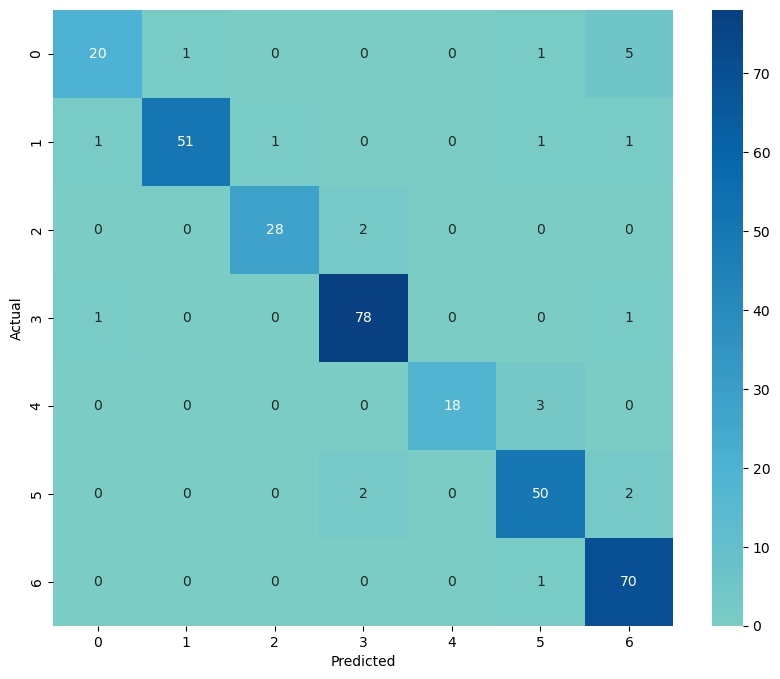

In [152]:
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, cmap="GnBu", center=0, cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [144]:
joblib.dump(forest, '../data/model_ex00.pkl')

['../data/model_ex00.pkl']